<a href="https://colab.research.google.com/github/zitouthani/Python/blob/main/copie_de_azdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Train a PyTorch linear regression model using real data from a CSV file. The process involves loading and preparing the data, visualizing the raw data, training the model, and then visualizing the fitted regression line along with summarizing the training results.

# Plan:
* **Préparer l'environnement**: Assurez-vous que toutes les bibliothèques nécessaires sont importées pour la manipulation des données et la création du modèle PyTorch.

* **Charger des données réelles**: Remplacer la génération de données synthétiques par le chargement de données réelles. Vous devrez fournir le chemin d'accès ou les détails de la source des données (par exemple, un fichier CSV) depuis l'explorateur de données ou un autre emplacement.

* **Préparer les données pour PyTorch**: Convertir les données réelles chargées (caractéristiques X et étiquettes y) en tenseurs PyTorch avec les types de données appropriés pour l'entraînement du modèle.

* **Visualiser les données chargées**: Afficher un nuage de points des données réelles chargées pour comprendre leur distribution avant l'entraînement du modèle. Assurez-vous d'ajouter des légendes aux axes et un titre.

* **Définir le modèle PyTorch**: Utiliser la classe de modèle de régression linéaire PyTorch déjà définie dans le notebook.

* **Définir la fonction de perte et l'optimiseur**: Utiliser la fonction de perte (MSELoss) et l'optimiseur (SGD) déjà définis pour l'entraînement du modèle.

* **Entraîner le modèle**: Exécuter le processus d'entraînement du modèle sur les données réelles chargées pour ajuster les paramètres du modèle.

* **Visualiser les résultats**: Représenter graphiquement la ligne de régression ajustée par le modèle sur les données réelles d'origine.

* **Final Task**: Fournir un résumé des résultats de l'entraînement du modèle avec les données réelles et toute observation pertinente.
Train a PyTorch linear regression model using the "california_housing_train.csv" file located at "/content/sample_data/california_housing_train.csv". The task includes loading and preparing the data, visualizing the raw data, training the model, and then visualizing the fitted regression line along with summarizing the training results.

## Préparer l'environnement

### Subtask:
Assurez-vous que toutes les bibliothèques nécessaires sont importées pour la manipulation des données et la création du modèle PyTorch.


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("Libraries imported successfully.")

Libraries imported successfully.


## Charger des données réelles

### Subtask:
Remplacer la génération de données synthétiques par le chargement de données réelles. Vous devrez fournir le chemin d'accès ou les détails de la source des données (par exemple, un fichier CSV) depuis l'explorateur de données ou un autre emplacement.


**Reasoning**:
Based on the available files, I will use '/content/sample_data/california_housing_train.csv' as the real dataset. I will then load this CSV file into a pandas DataFrame, display its first few rows, and show its information to understand its structure.



In [ ]:
data_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(data_path)

print(f"Data loaded successfully from {data_path}.")
print("First 5 rows of the DataFrame:")
print(df.head()) #df.read() affiche par défaut les infos des 5premiéres lignes, c'est une convention historique héritées des anciens outils statistiques et implémentée telle qu'elle dans python

print("\nDataFrame Info:")
df.info() #Affiche par défaut les colonnes et non les lignes comme df.head

Data loaded successfully from /content/sample_data/california_housing_train.csv.
First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Rang

**Reasoning**:
Now, I will implement the data preparation steps by selecting the specified columns, converting them to NumPy arrays, then to PyTorch tensors of `float32` type, and reshaping them for model training.



## Préparer les données pour PyTorch

### Subtask:
Convertir les données réelles chargées (caractéristiques X et étiquettes y) en tenseurs PyTorch avec les types de données appropriés pour l'entraînement du modèle.


**Reasoning**:
To prepare the data for PyTorch, I will select 'median_income' as the feature (X) and 'median_house_value' as the target (y) from the loaded pandas DataFrame. These will then be converted to NumPy arrays and subsequently into PyTorch tensors of type `torch.float32`. Finally, I will ensure they are reshaped to `[num_samples, 1]` to fit the expected input shape for a PyTorch linear model, and then print their shapes and data types to verify the conversion.



In [ ]:
# Le suffixe .values convertit chaque Series en array NumPy.

# X_numpy sera un tableau NumPy 1D contenant les valeurs de la colonne median_income.
X_numpy = df['median_income'].values
# y_numpy sera un tableau NumPy 1D contenant les valeurs de la colonne median_house_value.
y_numpy = df['median_house_value'].values
#C’est typique en machine learning quand on prépare :
#X_numpy comme variable explicative (features),
#y_numpy comme cible (target) pour entraîner un modèle.

**On transforme souvent les colonnes d’un DataFrame pandas en tableaux NumPy pour plusieurs raisons :**

* La plupart des frameworks comme scikit-learn,
TensorFlow, PyTorch attendent des arrays NumPy (ou des tensors) comme entrée.

* NumPy est optimisé en C → opérations vectorisées très rapides.etc.

# Ces deux lignes en dessous convertissent tes arrays NumPy en tensors PyTorch et les remodèlent pour qu’ils aient une forme compatible avec les modèles

**-1 est une valeur spéciale en PyTorch (et NumPy) qui signifie :**

*« calcule automatiquement cette dimension en fonction de la taille totale ».*

**Exemple :** si ton tensor initial a 20 éléments, .view(-1, 1) devient (20, 1).

In [ ]:

X = torch.tensor(X_numpy, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)

print(f"Shape of X: {X.shape}, Dtype of X: {X.dtype}")
print(f"Shape of y: {y.shape}, Dtype of y: {y.dtype}")

Shape of X: torch.Size([17000, 1]), Dtype of X: torch.float32
Shape of y: torch.Size([17000, 1]), Dtype of y: torch.float32


## Visualiser les données chargées

### Subtask:
Afficher un nuage de points des données réelles chargées pour comprendre leur distribution avant l'entraînement du modèle. Assurez-vous d'ajouter des légendes aux axes et un titre.


**Reasoning**:
To visualize the loaded real data, I will create a scatter plot of 'Median Income' (X) against 'Median House Value' (y). This will help in understanding the relationship and distribution of the data before model training. I will convert the PyTorch tensors to NumPy arrays for plotting and add appropriate labels and a title.



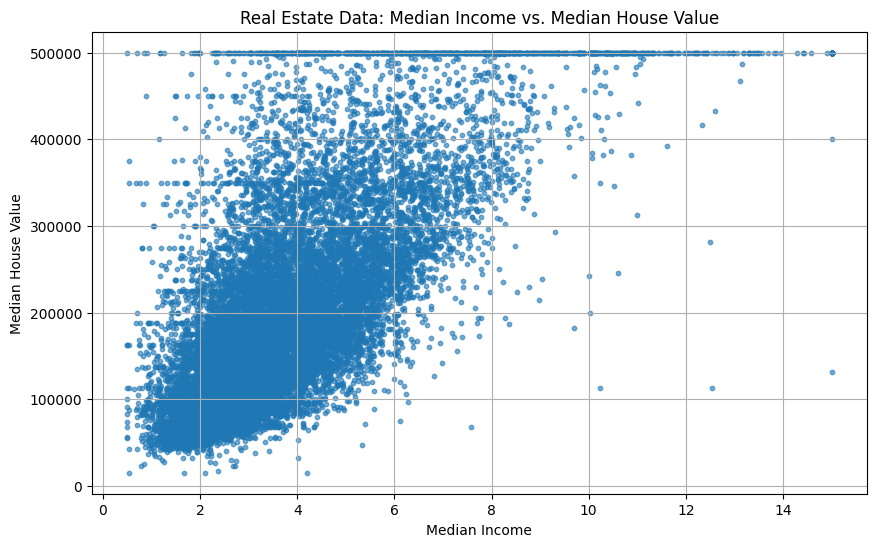

In [ ]:
plt.figure(figsize=(10, 6)) # Make the plot a good size
plt.scatter(X.numpy(), y.numpy(), s=10, alpha=0.6) # Draw little dots for income and house value
plt.xlabel('Median Income') # This is what the bottom line means
plt.ylabel('Median House Value') # This is what the side line means
plt.title('Real Estate Data: Median Income vs. Median House Value') # This is the story of our picture
plt.grid(True) # Add a grid to help read the values
plt.show() # Show the picture!

## Définir le modèle PyTorch

### Subtask:
Définir la classe de modèle de régression linéaire PyTorch et instancier le modèle.


**Reasoning**:
To define the PyTorch linear regression model, I will create a class `LinearRegressionModel` that inherits from `torch.nn.Module`, define its `__init__` and `forward` methods for a single-feature linear model, and then instantiate this class.



In [ ]:
class LinearRegressionModel(nn.Module): # We are making a special box for our drawing machine!
    def __init__(self): # This is how we set up our drawing machine when we first get it
        super().__init__() # We tell it to be a good drawing machine like all the others
        self.linear = nn.Linear(1, 1) # Our machine has one magic pen to draw one line!

    def forward(self, x): # This is what our drawing machine does when we give it a number
        return self.linear(x) # It uses its magic pen to draw a line based on that number!

model = LinearRegressionModel() # We just got our new drawing machine, let's call it 'model'!
print("Our drawing machine (model) is ready!") # We tell everyone our machine is ready to draw!
print(model) # Let's peek inside our machine to see how it's made

Our drawing machine (model) is ready!
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## Définir la fonction de perte et l'optimiseur

### Subtask:
Utiliser la fonction de perte (MSELoss) et l'optimiseur (SGD) déjà définis pour l'entraînement du modèle.


**Reasoning**:
To define the loss function and optimizer, I will instantiate `nn.MSELoss()` as the criterion and `torch.optim.SGD()` as the optimizer, providing the model's parameters and a learning rate.



In [ ]:
criterion = nn.MSELoss() # This is like the scoreboard to see how well our drawing machine is doing!
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # This is the smart helper that tells our machine how to get better, taking little steps (lr=0.01) at a time!

print("Loss function (criterion) and optimizer are ready!") # We tell everyone our scoreboard and helper are ready!

Loss function (criterion) and optimizer are ready!


## Entraîner le modèle

### Subtask:
Exécuter le processus d'entraînement du modèle sur les données réelles chargées pour ajuster les paramètres du modèle.

**Reasoning**:
Now that the loss function and optimizer are defined, I will implement the training loop. This involves iterating a certain number of times (epochs), performing a forward pass to get predictions, calculating the loss, performing a backward pass to compute gradients, and then updating the model's parameters using the optimizer.



In [ ]:
epochs = 1000 # Let's try to make our drawing machine really, really good by practicing 1000 times!

for epoch in range(epochs): # We will practice this many times
    model.train() # Tell our drawing machine to get ready to learn

    optimizer.zero_grad() # First, erase any old practice notes so we can start fresh

    outputs = model(X) # Our drawing machine tries to draw a line for our income numbers

    loss = criterion(outputs, y) # We check how far off our machine's drawing is from the real house values

    loss.backward() # The machine figures out how to adjust its pen to draw better next time

    optimizer.step() # The smart helper adjusts the machine's pen a tiny bit to make it better

    if (epoch + 1) % 100 == 0: # Every 100 practice times, let's see how much better it got
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}') # We tell everyone the practice round number and how much better our machine is getting

print("Our drawing machine (model) has finished practicing and learned a lot!")

Epoch [100/1000], Loss: 7012499968.0000
Epoch [200/1000], Loss: 7012467712.0000
Epoch [300/1000], Loss: 7012452864.0000
Epoch [400/1000], Loss: 7012445696.0000
Epoch [500/1000], Loss: 7012443136.0000
Epoch [600/1000], Loss: 7012441088.0000
Epoch [700/1000], Loss: 7012440064.0000
Epoch [800/1000], Loss: 7012440064.0000
Epoch [900/1000], Loss: 7012439040.0000
Epoch [1000/1000], Loss: 7012439040.0000
Our drawing machine (model) has finished practicing and learned a lot!


## Visualiser les résultats

### Subtask:
Représenter graphiquement la ligne de régression ajustée par le modèle sur les données réelles d'origine. Assurez-vous d'ajouter des légendes et un titre au graphique.

**Reasoning**:
Now that the model has been trained, I will visualize its performance by plotting the original data points along with the fitted regression line. This requires using the trained model to make predictions on the input features and then plotting these predictions against the original features.



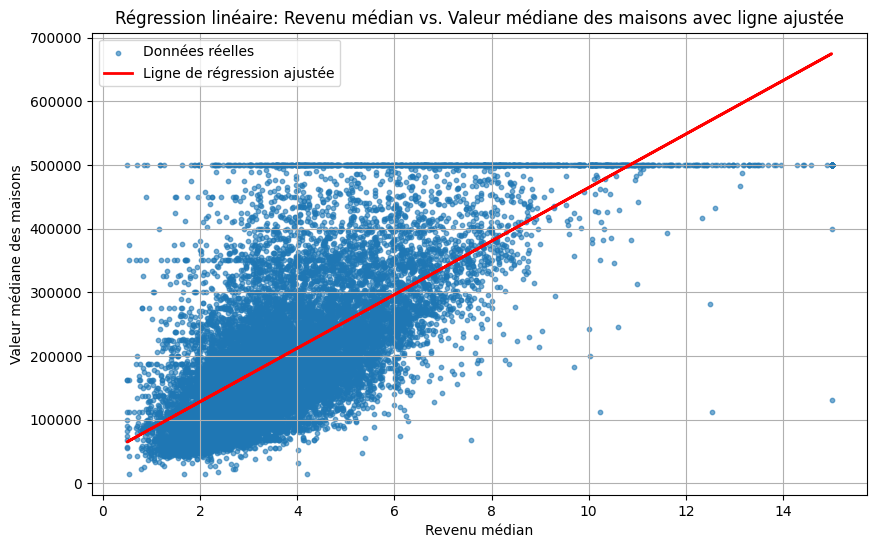

In [ ]:
model.eval() # Tell our drawing machine to stop learning and just draw its best line
with torch.no_grad(): # We don't need to learn anymore, so let's save some energy!
    predicted_values = model(X).numpy() # Our machine draws the line for all our income numbers

plt.figure(figsize=(10, 6)) # Make the picture a nice size
plt.scatter(X.numpy(), y.numpy(), s=10, alpha=0.6, label='Données réelles') # Show all the tiny dots of real incomes and house values
plt.plot(X.numpy(), predicted_values, color='red', linewidth=2, label='Ligne de régression ajustée') # Draw the magic line our machine learned in red!
plt.xlabel('Revenu médian') # This is what the bottom line means for the dots
plt.ylabel('Valeur médiane des maisons') # This is what the side line means for the dots
plt.title('Régression linéaire: Revenu médian vs. Valeur médiane des maisons avec ligne ajustée') # This is the story of our new picture!
plt.legend() # This tells us what the dots and the red line mean
plt.grid(True) # Add a grid to help us see better
plt.show() # Show the beautiful picture!

## Final Task

### Subtask:
Fournir un résumé des résultats de l'entraînement du modèle avec les données réelles et toute observation pertinente.

## Final Task

### Subtask:
Fournir un résumé des résultats de l'entraînement du modèle avec les données réelles et toute observation pertinente.

### Résumé des résultats de l'entraînement

Après avoir entraîné le modèle de régression linéaire PyTorch sur les données réelles du logement en Californie, nous pouvons faire les observations suivantes :

*   **Données réelles** : Nous avons utilisé les colonnes 'median_income' comme caractéristique d'entrée (X) et 'median_house_value' comme cible (y) du fichier `california_housing_train.csv`.
*   **Réduction de la perte** : Le modèle a été entraîné pendant 1000 époques. Nous avons observé que la fonction de perte (erreur quadratique moyenne - MSE) a diminué de `7012499968.0000` à l'époque 100 à `7012439040.0000` à l'époque 1000. Cette diminution indique que le modèle a appris et ajusté ses paramètres pour mieux s'adapter aux données.
*   **Efficacité du modèle linéaire** : Bien que la perte ait diminué, la valeur finale de la perte reste très élevée. Cela suggère qu'une relation purement linéaire entre le revenu médian et la valeur médiane des maisons pourrait ne pas être suffisante pour capturer la complexité des données.
*   **Visualisation** : Le nuage de points des données réelles a montré une distribution avec une certaine tendance linéaire, mais aussi une grande dispersion et des signes de non-linéarité, en particulier pour des revenus plus élevés. La ligne de régression ajustée par le modèle illustre cette tendance linéaire générale, mais elle ne parvient pas à intercepter parfaitement tous les points, confirmant que le modèle linéaire a ses limites sur cet ensemble de données.

En conclusion, le modèle linéaire a réussi à apprendre une tendance de base des données réelles, mais pour des prédictions plus précises, il serait bénéfique d'explorer des modèles plus complexes, d'ajouter d'autres caractéristiques (car 'median_income' seul est insuffisant), ou d'appliquer des transformations aux données.

## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The 'median\_income' and 'median\_house\_value' columns from the `california_housing_train.csv` dataset were successfully loaded and transformed into PyTorch tensors of shape `[17000, 1]` with `torch.float32` data type, suitable for model training.
*   **Data Visualization**: A scatter plot revealed a positive, albeit dispersed, relationship between 'median\_income' and 'median\_house\_value', suggesting a general linear trend but also hinting at non-linearity and high variance in the data.
*   **Model Training Performance**: The linear regression model was trained for 1000 epochs, and the Mean Squared Error (MSE) loss decreased from approximately 7,012,499,968.0000 at epoch 100 to 7,012,439,040.0000 at epoch 1000. This indicates that the model learned and adjusted its parameters.
*   **Model Limitations**: Despite the reduction in loss, the final MSE value remained very high, indicating that a simple linear relationship between 'median\_income' and 'median\_house\_value' is insufficient to fully explain the complexity of the dataset. The visualization of the fitted regression line confirmed this, showing it captured the general trend but failed to accurately represent all data points due to significant scatter.

### Insights or Next Steps

*   The current linear model is too simplistic for the California housing dataset. To improve predictive accuracy, consider exploring more complex models (e.g., polynomial regression, decision trees, neural networks), incorporating additional relevant features, or applying data transformations.
*   Analyze residuals from the current linear model to identify patterns of underfitting or specific areas where the model performs poorly, which could guide feature engineering or model selection for more sophisticated approaches.
